#### 3-Way Data Comparison
This notebook analyses the overlap between the CRC TCR Bulk sequencing dataset, GSE164522 metastatic dataset and the zhang dataset. The analysis focuses on sequence overlap, single-cell overlap, MAIT cell recognition and similarity across labels. 

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
import logomaker

#### Load Zhang Data

In [2]:
zhang_data_combined = pd.read_csv("~/CRC_Project/single_cell_data/Zhang_TCR_CRC_with_TissueType_cleaned.csv")

#### Load GSE164522 Data

In [8]:
GSE164522_data = pd.read_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_all_labels_publicity_MAIT.csv')
# add chain column - if v_gene starts with TRA TRA, else TRB
GSE164522_data['chain'] = np.where(GSE164522_data['v_gene'].str.startswith('TRA'), 'TRA', 'TRB')
GSE164522_data

,Unnamed: 0.1,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell
0,0,0,CAAGAAATCAGGCAAG-1,P08,CAARDGQKLLF,TGCGCCGCTCGAGATGGCCAGAAGCTGCTCTTT,TRAV1-1,TRAJ16,MT,0,1,TRA,non-MAIT_cell
1,1,1,CCGTACTAGAGGTACC-1,P08,CAPRDAGNMLTF,TGCGCTCCCAGAGACGCAGGCAACATGCTCACCTTT,TRAV1-1,TRAJ39,PT,0,1,TRA,non-MAIT_cell
2,2,2,CAGGTGCGTATTAGCC-1,P08,CAPWRANNLFF,TGCGCTCCGTGGAGGGCAAACAACCTCTTCTTT,TRAV1-1,TRAJ36,MN,0,1,TRA,non-MAIT_cell
3,3,3,TGACGGCTCGTCGTTC-1,P08,CAENDYKLSF,TGCGCTGAGAACGACTACAAGCTCAGCTTT,TRAV1-1,TRAJ20,MT,1,2,TRA,non-MAIT_cell
4,4,4,CGGACGTTCGCTTAGA-1,P08,CAGGYNQGGKLIF,TGCGCTGGGGGCTATAACCAGGGAGGAAAGCTTATCTTC,TRAV1-1,TRAJ23,PN,1,2,TRA,non-MAIT_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165289,165289,165293,GTTCGGGCATTCTCAT-1,P17,CSVEGEREFSDTQYF,TGCAGCGTTGAGGGTGAGCGGGAGTTTTCAGATACGCAGTATTTT,TRBV29-1,TRBJ2-3,MT,0,1,TRB,non-MAIT_cell
165290,165290,165294,ACGATACCAAGTACCT-1,P17,CASSYDSGREQFF,TGTGCCAGCAGTTATGATAGTGGACGCGAGCAGTTCTTC,TRBV5-4,TRBJ2-1,LN,0,1,TRB,non-MAIT_cell
165291,165291,165295,TGAGAGGAGCGAAGGG-1,P17,CASSVGTSGGADEQFF,TGTGCCAGCAGCGTAGGGACTAGCGGGGGGGCTGATGAGCAGTTCTTC,TRBV9,TRBJ2-1,LN,0,1,TRB,non-MAIT_cell
165292,165292,165296,GGTATTGAGGTGCAAC-1,P17,CASSLTSGSSQETQYF,TGTGCCAGCAGCTTGACTAGCGGGAGTTCACAAGAGACCCAGTACTTC,TRBV5-5,TRBJ2-5,MT,0,1,TRB,non-MAIT_cell


#### Overlap between sequences and tissues (Zhang and GSE164522)
Initially, we analyse the overlap between the 2 single-cell datasets

In [9]:
# Calculate overlap percentage
overlap_percentages = {}

# Overall overlap
set1 = set(zhang_data_combined['cdr3_aa'])
set2 = set(GSE164522_data['cdr3_aa'])
overall_overlap = set1.intersection(set2)
overall_overlap_percentage = len(overall_overlap) / len(set1) * 100

print(f"The overall percent overlap in sequence is {overall_overlap_percentage:.2f}%")

# Per tissue overlap
# Tissues in df1
tissues_zhang = zhang_data_combined['tissue'].unique()

for tissue in tissues_zhang:
    set1_tissue = set(zhang_data_combined[zhang_data_combined['tissue'] == tissue]['cdr3_aa'])
    set2_tissue = set(GSE164522_data[GSE164522_data['tissue'] == tissue]['cdr3_aa'])
    tissue_overlap = set1_tissue.intersection(set2_tissue)
    if set1_tissue:  # To avoid division by zero
        tissue_overlap_percentage = len(tissue_overlap) / len(set1_tissue) * 100
        print(f"The overlap percent for tissue {tissue} is {tissue_overlap_percentage:.2f}%")
    else:
        print(f"The overlap percent for tissue {tissue} is 0% (no data)")


The overall percent overlap in sequence is 9.81%
The overlap percent for tissue PN is 2.15%
The overlap percent for tissue PBMC is 3.82%
The overlap percent for tissue PT is 3.13%


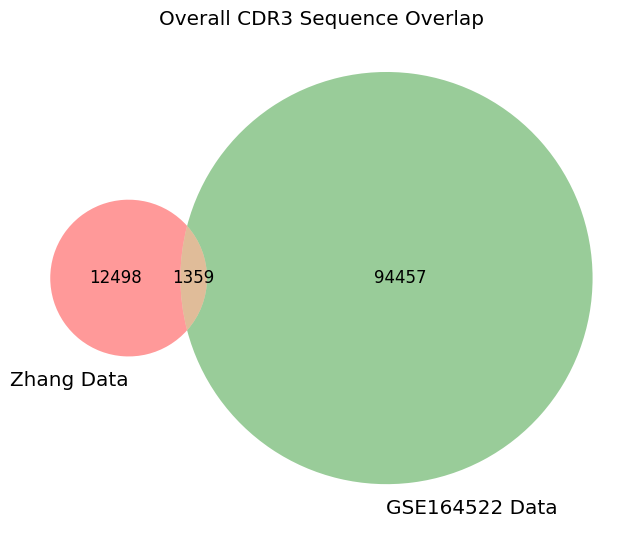

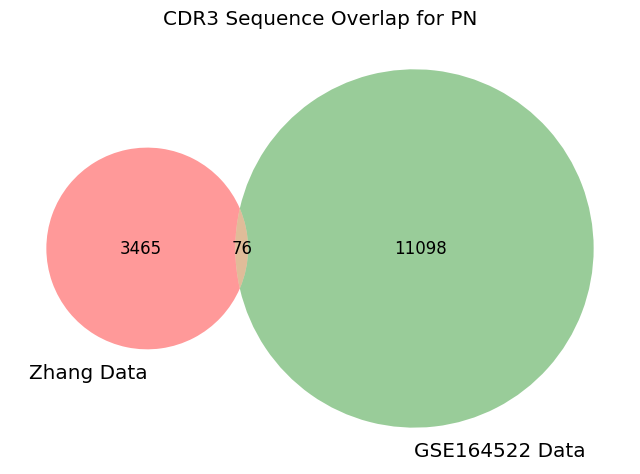

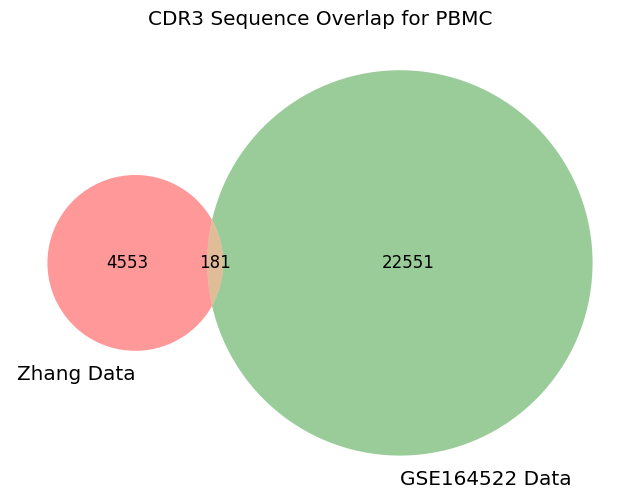

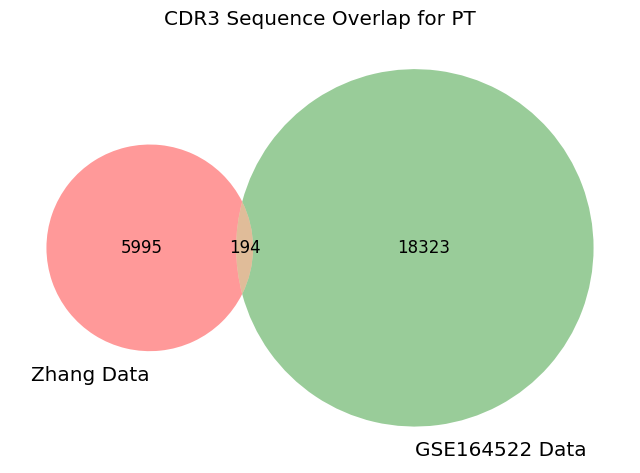

In [11]:
# Calculate overall overlap
set1 = set(zhang_data_combined['cdr3_aa'])
set2 = set(GSE164522_data['cdr3_aa'])

# Venn Diagram for overall overlap
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8, 8))
venn2([set1, set2], ('Zhang Data', 'GSE164522 Data'))
plt.title('Overall CDR3 Sequence Overlap')
plt.savefig('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/gse164522_zhang_overlap', dpi=1200)
plt.show()

# Venn Diagrams for each tissue type
tissues = zhang_data_combined['tissue'].unique()
for tissue in tissues:
    set1_tissue = set(zhang_data_combined[zhang_data_combined['tissue'] == tissue]['cdr3_aa'])
    set2_tissue = set(GSE164522_data[GSE164522_data['tissue'] == tissue]['cdr3_aa'])
    plt.figure(figsize=(8, 8))
    venn2([set1_tissue, set2_tissue], ('Zhang Data', 'GSE164522 Data'))
    plt.title(f'CDR3 Sequence Overlap for {tissue}')
    plt.savefig(f'/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/gse164522_zhang_overlap_{tissue}', dpi=1200)
    plt.show()

In [14]:
# print the sequences that are in the overall overlap
set1 = set(zhang_data_combined['cdr3_aa'])
set2 = set(GSE164522_data['cdr3_aa'])
overall_overlap = set1.intersection(set2)

# Convert list to DataFrame
overall_overlap_df = pd.DataFrame(list(overall_overlap), columns=['cdr3_aa'])

# Save the DataFrame to a CSV file
overall_overlap_df.to_csv('~/CRC_Project/single_cell_data/zhang_gse164522_common_sequences.csv', index=False)

In [12]:
# Splitting dataframes by chain type
zhang_TRA = zhang_data_combined[zhang_data_combined['chain'] == 'TRA'].rename(columns={'cdr3_aa': 'CDR3_TRA'})
zhang_TRB = zhang_data_combined[zhang_data_combined['chain'] == 'TRB'].rename(columns={'cdr3_aa': 'CDR3_TRB'})
gse164522_TRA = GSE164522_data[GSE164522_data['chain'] == 'TRA'].rename(columns={'cdr3_aa': 'CDR3_TRA'})
gse164522_TRB = GSE164522_data[GSE164522_data['chain'] == 'TRB'].rename(columns={'cdr3_aa': 'CDR3_TRB'})

# Merging TRA and TRB within each dataframe
# Assuming 'Cell name' is the column to join on in Zhang's data and 'barcode' in GSE164522 data
zhang_merged = pd.merge(zhang_TRA, zhang_TRB, on='Cell name', suffixes=('_TRA', '_TRB'))
gse164522_merged = pd.merge(gse164522_TRA, gse164522_TRB, on='barcode', suffixes=('_TRA', '_TRB'))

# Finding matching cells across datasets
# Make sure to retain identification info from both datasets with appropriate suffixes
matching_cells = pd.merge(zhang_merged, gse164522_merged, on=['CDR3_TRA', 'CDR3_TRB'], suffixes=('_zhang', '_gse164522'))

matching_cells['tissue_zhang'] = matching_cells['tissue_TRA_zhang']
matching_cells['tissue_gse164522'] = matching_cells['tissue_TRA_gse164522']

# Add clarity to output, by selecting columns to display
print("Matching cells with identical TRA and TRB sequences:")
print(matching_cells[['Cell name', 'barcode', 'CDR3_TRA', 'CDR3_TRB', 'tissue_zhang', 'tissue_gse164522']])


Matching cells with identical TRA and TRB sequences:
         Cell name             barcode         CDR3_TRA         CDR3_TRB  \
0   NTC72-20180123  AGCTCCTAGAGACTAT-1  CAMREGTGGYNKLIF   CASSLGGGLYEQYF   
1   NTC72-20180123  TGACTTTGTTCTGAAC-1  CAMREGTGGYNKLIF   CASSLGGGLYEQYF   
2  TTC158-20170215  GACGGCTTCGTTTAGG-1  CLVGDRGTGGFKTIF     CASSSREETQYF   
3    P0701-TTR-141  CAGAATCGTCTCACCT-1    CAARKTSGSRLTF   CSAKRGPSTDTQYF   
4    PTH21-0909-ZL  AGCGTATAGAGCTATA-1   CAVREASGTYKYIF     CASRLAGETQYF   
5   TP763-20180309  GCTGGGTTCCACGTTC-1     CAFLNAGNMLTF  CASSLTGTNSYEQYF   
6   NTH38-20170215  GACGTTACAAGCCTAT-1   CAVSESSGTYKYIF   CSAALAGGTGELFF   
7    TTH5-20170411  GTTCTCGGTCGCGAAA-1    CAVNKDSSYKLIF   CASSLAGGGTEAFF   
8  TTC58-160909-ZL  GTACTCCCAACCGCCA-1     CAVMDSSYKLIF     CSAREREYEQYF   
9       PTH39-1212  GTACGTAGTTAAGACA-1  CAVQGTGAGSYQLTF     CASSLDGKGYTF   

  tissue_zhang tissue_gse164522  
0           PN               PN  
1           PN               LN  
2       

In [13]:
# Create a single list from both CDR3 TRA and TRB columns
combined_sequences = matching_cells['CDR3_TRA'].tolist() + matching_cells['CDR3_TRB'].tolist()

# Remove duplicates by converting the list to a set, then back to a list if order doesn't matter
unique_sequences = list(set(combined_sequences))

# Output the unique sequences list to verify
print(str(len(unique_sequences)) + " unique CDR3 sequences in both datasets:", unique_sequences)

18 unique CDR3 sequences in both datasets: ['CAARKTSGSRLTF', 'CSAKRGPSTDTQYF', 'CAMREGTGGYNKLIF', 'CASSLTGTNSYEQYF', 'CLVGDRGTGGFKTIF', 'CAVSESSGTYKYIF', 'CASSLAGGGTEAFF', 'CAVQGTGAGSYQLTF', 'CASSLDGKGYTF', 'CAVMDSSYKLIF', 'CASSLGGGLYEQYF', 'CASSSREETQYF', 'CSAALAGGTGELFF', 'CSAREREYEQYF', 'CAFLNAGNMLTF', 'CAVNKDSSYKLIF', 'CAVREASGTYKYIF', 'CASRLAGETQYF']


In [14]:
# Convert list to DataFrame
unique_sequences_df = pd.DataFrame(unique_sequences, columns=['cdr3_aa'])

# Save the DataFrame to a CSV file
unique_sequences_df.to_csv('~/CRC_Project/single_cell_data/zhang_gse164522_sc_paired_cdr3_18_sequences.csv', index=False)

Look at the tissues of the subset of sequences found, in each dataset.

In [16]:
# Function to find tissues for unique sequences
def find_tissues_for_sequences(df, sequences):
    results = {}
    for sequence in sequences:
        tissues = df[df['cdr3_aa'] == sequence]['tissue'].unique()
        results[sequence] = tissues
    return results

# Getting tissue associations for each unique sequence from both dataframes
tissues_df1 = find_tissues_for_sequences(zhang_data_combined, unique_sequences)
tissues_df2 = find_tissues_for_sequences(GSE164522_data, unique_sequences)

# Printing results
print("Tissues in DF1 for unique sequences:")
for seq, tissues in tissues_df1.items():
    print(f"Sequence {seq}: Found in tissues {tissues}")

print("\nTissues in DF2 for unique sequences:")
for seq, tissues in tissues_df2.items():
    print(f"Sequence {seq}: Found in tissues {tissues}")


Tissues in DF1 for unique sequences:
Sequence CAARKTSGSRLTF: Found in tissues ['PT']
Sequence CSAKRGPSTDTQYF: Found in tissues ['PT']
Sequence CAMREGTGGYNKLIF: Found in tissues ['PN']
Sequence CASSLTGTNSYEQYF: Found in tissues ['PT']
Sequence CLVGDRGTGGFKTIF: Found in tissues ['PT']
Sequence CAVSESSGTYKYIF: Found in tissues ['PN']
Sequence CASSLAGGGTEAFF: Found in tissues ['PT']
Sequence CAVQGTGAGSYQLTF: Found in tissues ['PN' 'PBMC']
Sequence CASSLDGKGYTF: Found in tissues ['PBMC']
Sequence CAVMDSSYKLIF: Found in tissues ['PBMC' 'PT' 'PN']
Sequence CASSLGGGLYEQYF: Found in tissues ['PN']
Sequence CASSSREETQYF: Found in tissues ['PT']
Sequence CSAALAGGTGELFF: Found in tissues ['PN']
Sequence CSAREREYEQYF: Found in tissues ['PT']
Sequence CAFLNAGNMLTF: Found in tissues ['PT']
Sequence CAVNKDSSYKLIF: Found in tissues ['PT']
Sequence CAVREASGTYKYIF: Found in tissues ['PBMC']
Sequence CASRLAGETQYF: Found in tissues ['PBMC']

Tissues in DF2 for unique sequences:
Sequence CAARKTSGSRLTF: Foun

In [17]:
zhang_data_combined.rename(columns={'Patient': 'patient'}, inplace=True)

In [19]:
def find_tissues_and_patients_for_sequences(df, sequences):
    results = []
    for sequence in sequences:
        tissue_list = df[df['cdr3_aa'] == sequence]['tissue'].unique()
        patient_count = df[df['cdr3_aa'] == sequence]['patient'].nunique()
        results.append({'Sequence': sequence, 'Tissues': tissue_list, 'Patient Count': patient_count})
    return pd.DataFrame(results)

tissues_patients_df1 = find_tissues_and_patients_for_sequences(zhang_data_combined, unique_sequences)
tissues_patients_df2 = find_tissues_and_patients_for_sequences(GSE164522_data, unique_sequences)

# Rename columns for clarity
tissues_patients_df1.rename(columns={'Tissues': 'Tissue List Zhang', 'Patient Count': 'Patient Count Zhang'}, inplace=True)
tissues_patients_df2.rename(columns={'Tissues': 'Tissue List GSE164522', 'Patient Count': 'Patient Count GSE164522'}, inplace=True)

# Merge on 'Sequence' to get a unified view
merged_tissues_patients = pd.merge(tissues_patients_df1, tissues_patients_df2, on='Sequence', how='outer')

# Converting tissue lists to comma-separated strings for easier viewing
merged_tissues_patients['Tissue List Zhang'] = merged_tissues_patients['Tissue List Zhang'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
merged_tissues_patients['Tissue List GSE164522'] = merged_tissues_patients['Tissue List GSE164522'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Display the resulting DataFrame
merged_tissues_patients

,Sequence,Tissue List Zhang,Patient Count Zhang,Tissue List GSE164522,Patient Count GSE164522
0,CAARKTSGSRLTF,[PT],1,"[PT, MT]",2
1,CAFLNAGNMLTF,[PT],1,[MN],1
2,CAMREGTGGYNKLIF,[PN],1,"[PN, LN]",1
3,CASRLAGETQYF,[PBMC],1,[MN],1
4,CASSLAGGGTEAFF,[PT],1,"[PBMC, MN, MT, PN, PT]",2
5,CASSLDGKGYTF,[PBMC],1,[LN],1
6,CASSLGGGLYEQYF,[PN],1,"[PN, LN]",1
7,CASSLTGTNSYEQYF,[PT],1,[MN],1
8,CASSSREETQYF,[PT],1,[PBMC],1
9,CAVMDSSYKLIF,"[PBMC, PT, PN]",3,"[MN, MT, PT, PN, PBMC, LN]",10


Plot patient count of shared sequences 

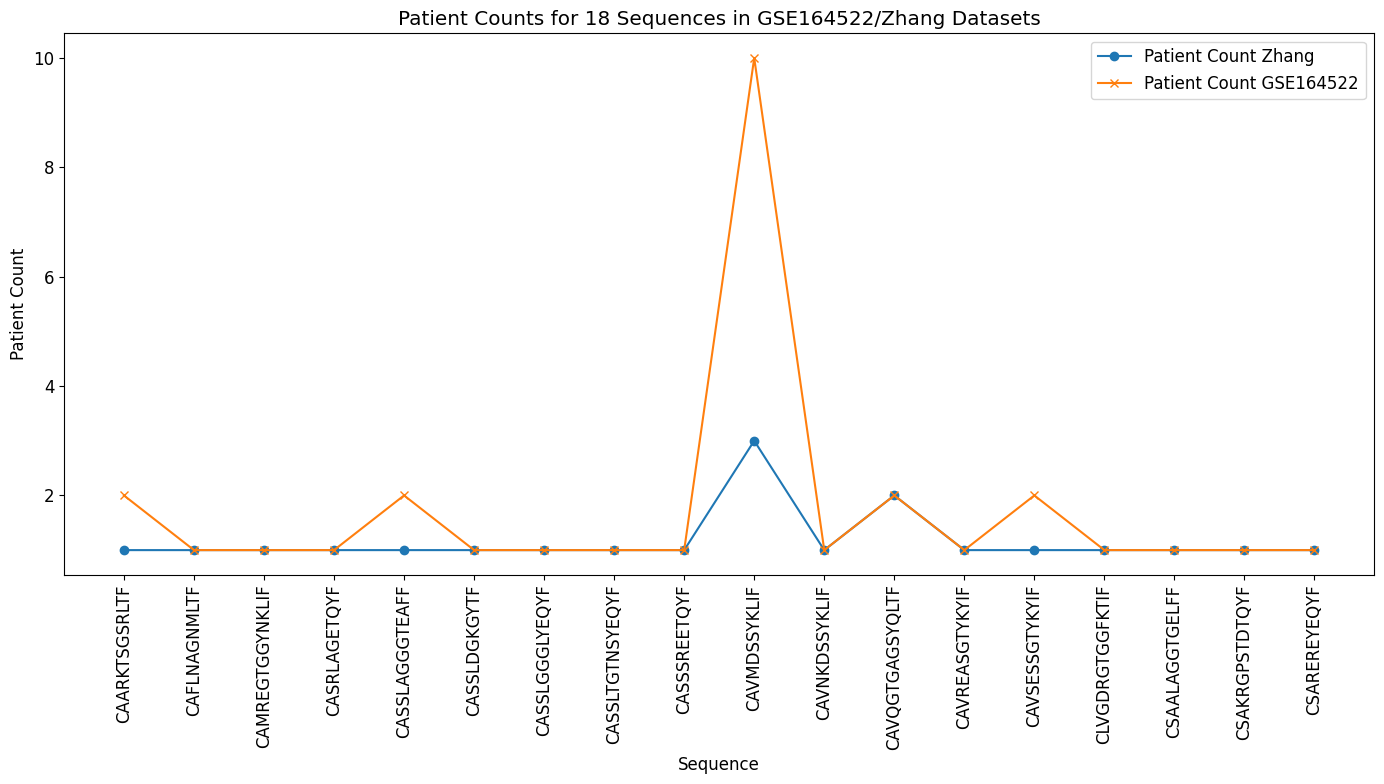

In [20]:
def plot_patient_counts(df, dataset1_name, dataset2_name):
    plt.figure(figsize=(14, 8))
    
    # Plot patient counts for both datasets
    plt.plot(df['Sequence'], df['Patient Count Zhang'], label=f'Patient Count {dataset1_name}', marker='o')
    plt.plot(df['Sequence'], df['Patient Count GSE164522'], label=f'Patient Count {dataset2_name}', marker='x')
    
    plt.xlabel('Sequence')
    plt.ylabel('Patient Count')
    plt.title('Patient Counts for 18 Sequences in GSE164522/Zhang Datasets')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot the results
plot_patient_counts(merged_tissues_patients, 'Zhang', 'GSE164522')

#### MAIT-cell Analysis

In [16]:
GSE164522_data_uniques = GSE164522_data[GSE164522_data['cdr3_aa'].isin(unique_sequences)]
GSE164522_data_uniques

,Unnamed: 0.1,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell
221,221,221,CAACCTCTCACTATTC-1,P08,CAVMDSSYKLIF,TGTGCTGTCATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2,TRAJ12,MN,1,10,TRA,MAIT_cell
222,222,222,TGAGGGAGTACAGTGG-1,P08,CAVMDSSYKLIF,TGTGCTGTCATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2,TRAJ12,MN,1,10,TRA,MAIT_cell
223,223,223,AGTGGGATCTACTATC-1,P08,CAVMDSSYKLIF,TGTGCTGTCATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2,TRAJ12,MN,1,10,TRA,MAIT_cell
224,224,224,CCAATCCGTCACCTAA-1,P08,CAVMDSSYKLIF,TGTGCTGTCATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2,TRAJ12,MN,1,10,TRA,MAIT_cell
225,225,225,GACTAACCAGTGAGTG-1,P08,CAVMDSSYKLIF,TGTGCTGTCATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2,TRAJ12,MN,1,10,TRA,MAIT_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133287,133287,133290,AGCGTATAGAGCTATA-1,P14,CASRLAGETQYF,TGTGCCAGTAGGCTAGCGGGCGAGACCCAGTACTTC,TRBV19,TRBJ2-5,MN,0,1,TRB,non-MAIT_cell
152713,152713,152716,GACGTTACAAGCCTAT-1,P16,CSAALAGGTGELFF,TGCAGCGCCGCCCTGGCAGGGGGCACCGGGGAGCTGTTTTTT,TRBV20-1,TRBJ2-2,PBMC,0,1,TRB,non-MAIT_cell
157018,157018,157021,AGCTCCTAGAGACTAT-1,P17,CASSLGGGLYEQYF,TGTGCCAGCAGCTTAGGCGGGGGTCTCTACGAGCAGTACTTC,TRBV7-2,TRBJ2-7,PN,0,1,TRB,non-MAIT_cell
157019,157019,157022,TGACTTTGTTCTGAAC-1,P17,CASSLGGGLYEQYF,TGTGCCAGCAGCTTAGGCGGGGGTCTCTACGAGCAGTACTTC,TRBV7-2,TRBJ2-7,LN,0,1,TRB,non-MAIT_cell


In [17]:
collections.Counter(GSE164522_data_uniques['cdr3_aa'])

Counter({'CAVMDSSYKLIF': 139,
         'CASSLAGGGTEAFF': 19,
         'CLVGDRGTGGFKTIF': 9,
         'CAVQGTGAGSYQLTF': 3,
         'CAARKTSGSRLTF': 2,
         'CAVSESSGTYKYIF': 2,
         'CAMREGTGGYNKLIF': 2,
         'CASSLGGGLYEQYF': 2,
         'CAFLNAGNMLTF': 1,
         'CAVNKDSSYKLIF': 1,
         'CAVREASGTYKYIF': 1,
         'CASSLTGTNSYEQYF': 1,
         'CSAKRGPSTDTQYF': 1,
         'CASSSREETQYF': 1,
         'CSAREREYEQYF': 1,
         'CASRLAGETQYF': 1,
         'CSAALAGGTGELFF': 1,
         'CASSLDGKGYTF': 1})

<Figure size 1000x400 with 0 Axes>

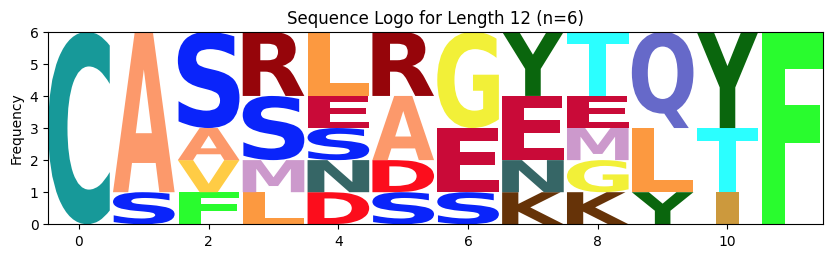

<Figure size 1000x400 with 0 Axes>

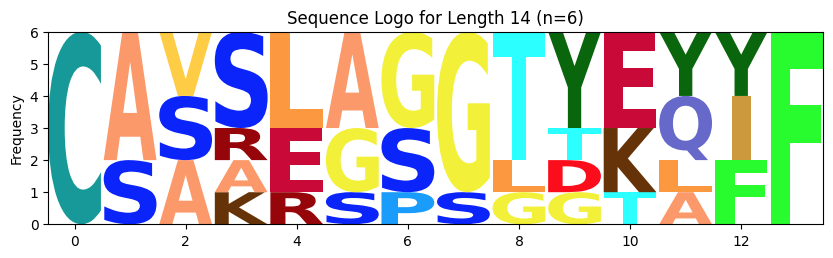

<Figure size 1000x400 with 0 Axes>

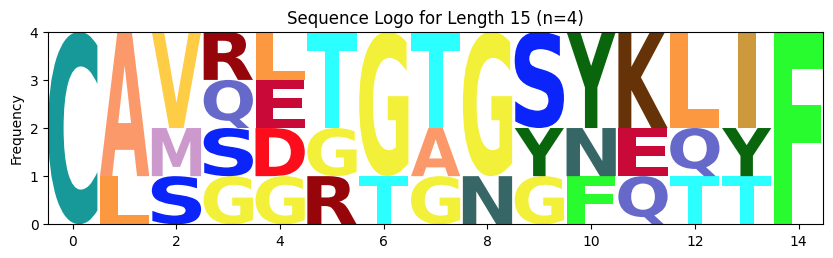

<Figure size 1000x400 with 0 Axes>

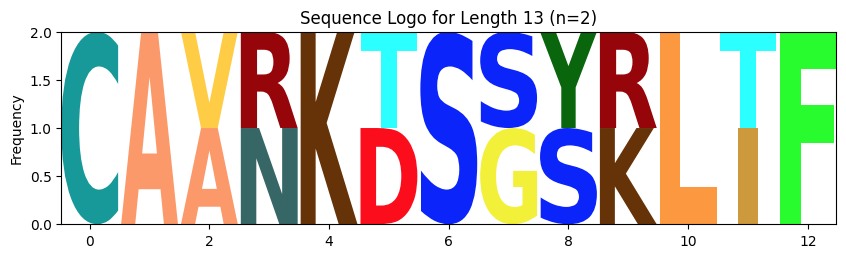

In [18]:
# create logo for the unique sequences
length_groups = {}
for seq in unique_sequences:
    seq_length = len(seq)
    if seq_length not in length_groups:
        length_groups[seq_length] = []
    length_groups[seq_length].append(seq)

# Step 2: Create a sequence logo for each group
for length, seqs in length_groups.items():
    # Create a counts matrix using Logomaker
    crm = logomaker.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='X-')

    # Create the logo
    plt.figure(figsize=(10, 4))
    logo = logomaker.Logo(crm, color_scheme='skylign_protein')
    logo.ax.set_ylabel("Frequency")
    logo.ax.set_title(f"Sequence Logo for Length {length} (n={len(seqs)})")
    plt.show()

#### Unique MAIT Overlap

In [94]:
# extract public MAIT cells from zhang data
MAIT_df_zhang = zhang_data_combined[zhang_data_combined['Invariant TCR'] == 'MAIT']
MAIT_df_zhang_public = MAIT_df_zhang[MAIT_df_zhang['publicity'] == 1]
public_zhang_MAIT = MAIT_df_zhang_public['cdr3_aa'].unique().tolist()
len(public_zhang_MAIT)

11

In [95]:
# extract public MAIT cells from GSE164522 data
MAIT_df_gse164522 = GSE164522_data[GSE164522_data['MAIT_cell'] == 'MAIT_cell']
MAIT_df_gse164522_public = MAIT_df_gse164522[MAIT_df_gse164522['publicity'] == 1]
public_gse164522_MAIT = MAIT_df_gse164522_public['cdr3_aa'].unique().tolist()
len(public_gse164522_MAIT)

265

In [96]:
# overlap between public MAIT sequences
public_MAIT_overlap = set(public_zhang_MAIT).intersection(set(public_gse164522_MAIT))
public_MAIT_overlap

{'CAVMDSSYKLIF'}

In [97]:
def find_tissues_for_sequences(df, sequences):
    results = {}
    for sequence in sequences:
        tissues = df[df['cdr3_aa'] == sequence]['tissue'].unique()
        results[sequence] = tissues
    return results

# in what tissues do the overlapping public MAIT sequences appear?
tissues_zhang_MAIT = find_tissues_for_sequences(MAIT_df_zhang_public, list(public_MAIT_overlap))
tissues_gse164522_MAIT = find_tissues_for_sequences(MAIT_df_gse164522_public, list(public_MAIT_overlap))

# make a dataframe for the tissues
tissues_df_zhang_MAIT = pd.DataFrame(tissues_zhang_MAIT.items(), columns=['cdr3_aa', 'tissues_zhang'])
tissues_df_gse164522_MAIT = pd.DataFrame(tissues_gse164522_MAIT.items(), columns=['cdr3_aa', 'tissues_gse164522'])

# merge the two dataframes
tissues_merged_MAIT = pd.merge(tissues_df_zhang_MAIT, tissues_df_gse164522_MAIT, on='cdr3_aa', how='outer')
tissues_merged_MAIT

,cdr3_aa,tissues_zhang,tissues_gse164522
0,CAVMDSSYKLIF,"[PBMC, PT, PN]","[MN, MT, PBMC, LN, PN, PT]"


#### Single-cell Dataset Overlap with CRC TCR Bulk Sequencing Dataset

In [ ]:
# Load and prepare data
CRC_data = pd.read_csv('/home/ubuntu/CRC_blood/downsampled_data.csv')
CRC_data['v_gene'] = CRC_data['V.name'].str.split('*', expand=True)[0]
CRC_data['j_gene'] = CRC_data['J.name'].str.split('*', expand=True)[0]
CRC_data['chain'] = np.where(CRC_data['v_gene'].str.startswith('TRAV'), 'TRA', 'TRB')

In [22]:
# add T, N, M columns
t_n_m_labels = pd.read_csv('/home/ubuntu/CRC_blood/t_n_m_labels.csv')
# rename Unnamed: 0 to Subject
t_n_m_labels = t_n_m_labels.rename(columns={'Unnamed: 0': 'Subject'})
# remove Unnamed: 1
t_n_m_labels = t_n_m_labels.drop(columns=['Unnamed: 1'])

CRC_data['T'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['T'])
CRC_data['N'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['N'])
CRC_data['M'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['M'])

In [36]:
CRC_data_unique_sequences = CRC_data[CRC_data['CDR3.aa'].isin(unique_sequences)]

# group by CDR3 sequence and show the T N M status
grouped = CRC_data_unique_sequences.groupby('CDR3.aa').agg({'T': 'first', 'N': 'first', 'M': 'first'}).reset_index()
grouped

,CDR3.aa,T,N,M
0,CAFLNAGNMLTF,3.0,0.0,0.0
1,CASRLAGETQYF,3.0,0.0,0.0
2,CASSLAGGGTEAFF,2.0,0.0,0.0
3,CASSLDGKGYTF,3.0,0.0,0.0
4,CASSLGGGLYEQYF,2.0,0.0,0.0
5,CASSSREETQYF,2.0,2.0,0.0
6,CAVMDSSYKLIF,3.0,1.0,0.0
7,CAVQGTGAGSYQLTF,3.0,0.0,0.0
8,CAVREASGTYKYIF,3.0,0.0,1.0
9,CAVSESSGTYKYIF,1.0,0.0,0.0


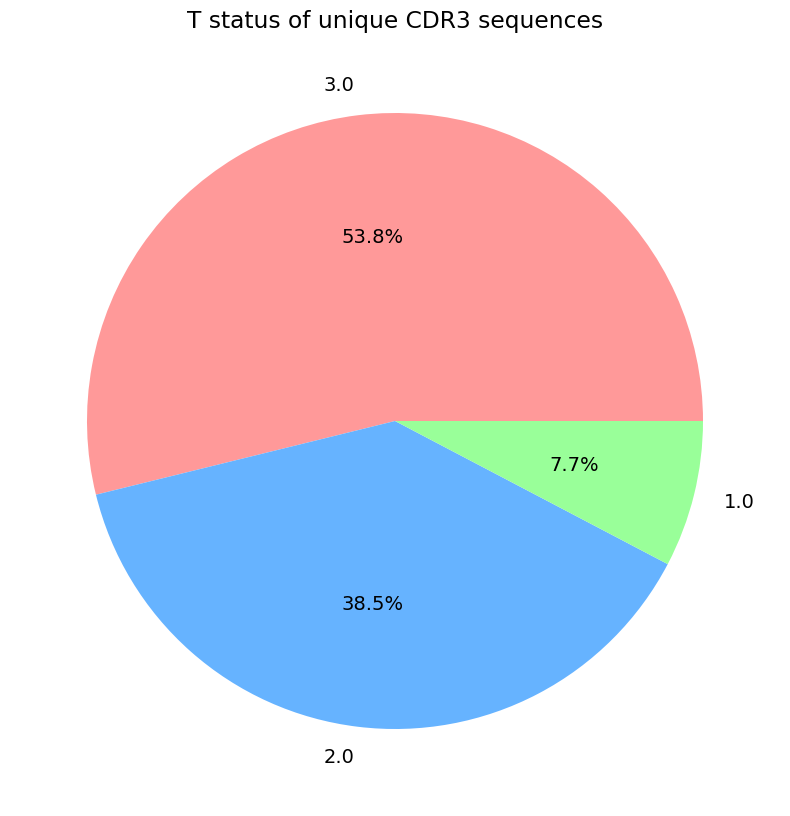

In [37]:
# pie chart for the T status of the unique sequences (3-way overlap)
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 10))
plt.pie(grouped['T'].value_counts(), labels=grouped['T'].value_counts().index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('T status of unique CDR3 sequences')
plt.savefig('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/t_pie_shared_3_datasets_sequences.png', dpi=1200)
plt.show()

In [38]:
# export 13 shared sequences to csv files
unique_sequences_CRC = CRC_data_unique_sequences['CDR3.aa']
unique_sequences_CRC.to_csv('~/CRC_Project/single_cell_data/shared_13_sequences_CRC_zhang_gse164522.csv', index=False)

In [28]:
collections.Counter(CRC_data_unique_sequences['CDR3.aa'])

Counter({'CASSLAGGGTEAFF': 17,
         'CAVMDSSYKLIF': 8,
         'CASRLAGETQYF': 7,
         'CAVQGTGAGSYQLTF': 6,
         'CASSLGGGLYEQYF': 5,
         'CAVREASGTYKYIF': 5,
         'CSAREREYEQYF': 4,
         'CASSSREETQYF': 4,
         'CLVGDRGTGGFKTIF': 3,
         'CASSLDGKGYTF': 3,
         'CAVSESSGTYKYIF': 3,
         'CSAKRGPSTDTQYF': 1,
         'CAFLNAGNMLTF': 1})

In [40]:
CRC_DATA = CRC_data_unique_sequences
CRC_DATA.rename(columns={'CDR3.aa': 'cdr3_aa'}, inplace=True)

/tmp/ipykernel_273188/4115266582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRC_DATA.rename(columns={'CDR3.aa': 'cdr3_aa'}, inplace=True)


##### Plot Patient Count for each of the 13 Shared Sequences

In [41]:
def find_patient_counts_for_sequences(df, sequences, id_column='patient'):
    results = []
    for sequence in sequences:
        patient_count = df[df['cdr3_aa'] == sequence][id_column].nunique()
        results.append({'Sequence': sequence, 'Patient Count': patient_count})
    return pd.DataFrame(results)


tissues_patients_df1 = find_patient_counts_for_sequences(zhang_data_combined, unique_sequences)
tissues_patients_df2 = find_patient_counts_for_sequences(GSE164522_data, unique_sequences)
crc_patients_df = find_patient_counts_for_sequences(CRC_DATA, unique_sequences_CRC, id_column='SampleID')

# Rename columns for clarity
tissues_patients_df1.rename(columns={'Patient Count': 'Patient Count Zhang'}, inplace=True)
tissues_patients_df2.rename(columns={'Patient Count': 'Patient Count GSE164522'}, inplace=True)
crc_patients_df.rename(columns={'Patient Count': 'Patient Count Bulk CRC'}, inplace=True)

# Merge on 'Sequence' to get a unified view
merged_patients = pd.merge(tissues_patients_df1, tissues_patients_df2, on='Sequence', how='outer')
merged_patients = pd.merge(merged_patients, crc_patients_df, on='Sequence', how='outer')

# Count the presence of each sequence across the datasets
merged_patients['Presence Count'] = merged_patients.apply(
    lambda row: sum([
        not pd.isna(row['Patient Count Zhang']),
        not pd.isna(row['Patient Count GSE164522']),
        not pd.isna(row['Patient Count Bulk CRC'])
    ]), axis=1
)

# Sort the DataFrame based on Presence Count and then by Sequence for consistency
merged_patients_sorted = merged_patients.sort_values(by=['Presence Count', 'Sequence'], ascending=[False, True])


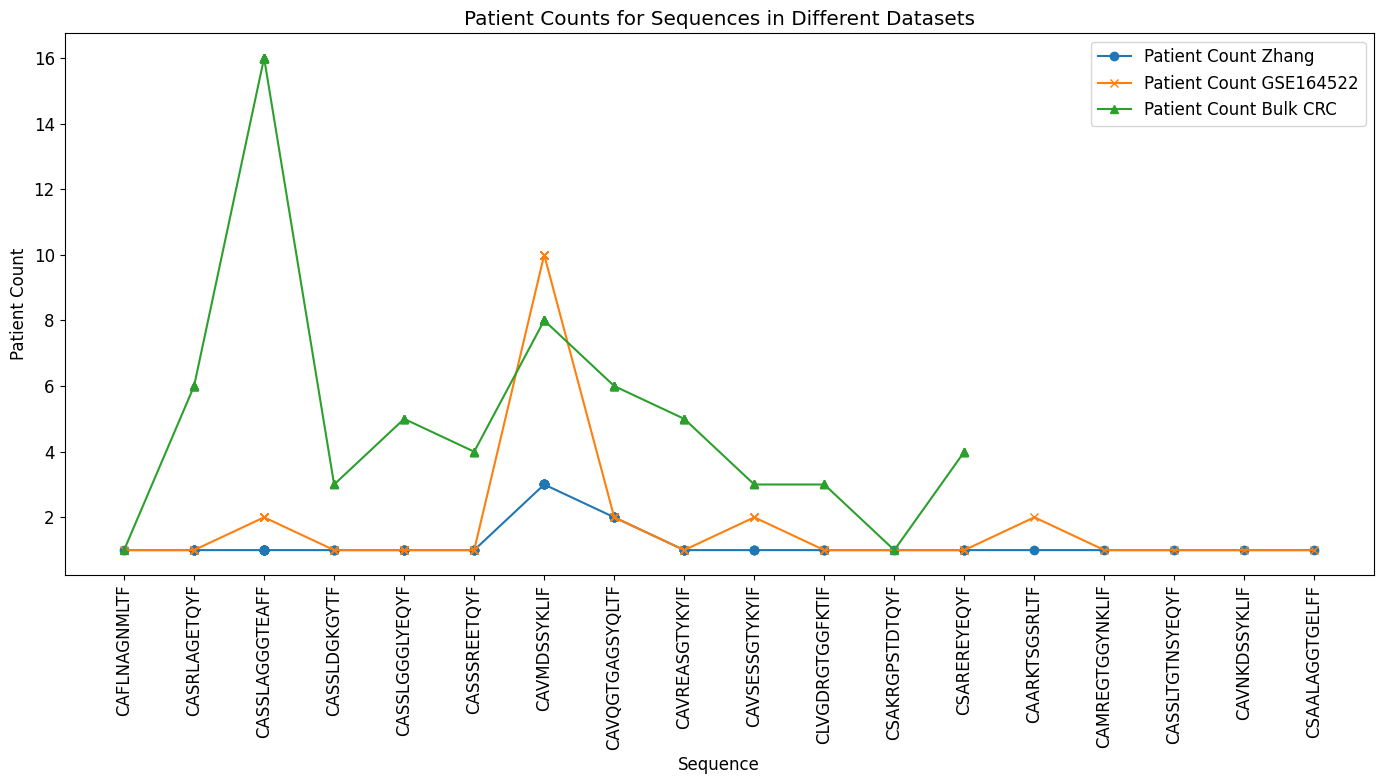

In [44]:
def plot_patient_counts(df, dataset1_name, dataset2_name, dataset3_name):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=(14, 8))
    
    # Plot patient counts for all three datasets
    plt.plot(df['Sequence'], df['Patient Count Zhang'], label=f'Patient Count {dataset1_name}', marker='o')
    plt.plot(df['Sequence'], df['Patient Count GSE164522'], label=f'Patient Count {dataset2_name}', marker='x')
    plt.plot(df['Sequence'], df['Patient Count Bulk CRC'], label=f'Patient Count Bulk {dataset3_name}', marker='^')
    
    plt.xlabel('Sequence')
    plt.ylabel('Patient Count')
    plt.title('Patient Counts for Sequences in Different Datasets')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/patient_counts_shared_3_datasets_sequences.png', dpi=1200)
    plt.show()

# Plot the results with sorted sequences
plot_patient_counts(merged_patients_sorted, 'Zhang', 'GSE164522', 'CRC')


##### Public MAIT Overlap

In [83]:
# which seuqnece are in CRC of the public_MAIT_overlap sequences
public_MAIT_overlap_CRC = CRC_data_unique_sequences[CRC_data_unique_sequences['CDR3.aa'].isin(public_MAIT_overlap)]
public_MAIT_overlap_CRC

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain,T,N,M
3631,3632,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1980),NaN,TRAJ12*00(561),10,NaN,...,-4,-1,5378,pool1_S1,TRAV1-2,TRAJ12,TRA,3.0,1.0,0.0
49904,49905,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1931),NaN,TRAJ12*00(561),10,NaN,...,-4,-1,57161,pool1_S15,TRAV1-2,TRAJ12,TRA,NaN,NaN,NaN
122813,122814,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1965.3),NaN,TRAJ12*00(575.5),10,NaN,...,-4,-1,1868,pool1_S5,TRAV1-2,TRAJ12,TRA,3.0,0.0,0.0
127442,127443,2,0.000174,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1975),NaN,TRAJ12*00(590),10,NaN,...,-4,-1,374,pool1_S6,TRAV1-2,TRAJ12,TRA,3.0,0.0,0.0
179381,179382,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1970),NaN,TRAJ12*00(561),10,NaN,...,-4,-1,8911,pool2_S13,TRAV1-2,TRAJ12,TRA,2.0,0.0,0.0
664677,664678,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1932.8),NaN,TRAJ12*00(575.5),10,NaN,...,-4,-1,1766,pool5_S10,TRAV1-2,TRAJ12,TRA,3.0,1.0,0.0
830722,830723,1,0.000087,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1968.9),NaN,TRAJ12*00(570.7),10,NaN,...,-4,-1,395,pool6_S10,TRAV1-2,TRAJ12,TRA,3.0,1.0,NaN
848900,848901,2,0.000174,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,CAVMDSSYKLIF,TRAV1-2*00(1960),NaN,TRAJ12*00(590),10,NaN,...,-4,-1,831,pool6_S13,TRAV1-2,TRAJ12,TRA,2.0,0.0,0.0


In [86]:
public_MAIT_overlap

{'CAVDNDYKLSF', 'CAVMDSSYKLIF', 'CAVNDYKLSF'}